In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd #data clean

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Machine Learning/Salary Data.csv") # imprt the data from

BASIC EDA

In [4]:
data.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
data.shape

(375, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [7]:
data.dropna(inplace=True) # symmetrically distributed h toh mean
 # skewed h toh median se karenge
 # cateogrical h toh mode use karenge

In [8]:
# replacing null values (if there are more missing values)
# data["Age"].fillna(data["Age"].mean(),inplace=True)

In [9]:
data.shape

(373, 6)

In [10]:
data.describe() # hame batata h ki kitna standard deviation h kitna count h kitna means h kitna  maximum h kitnia minimum h  # basic EDA

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


for Data Visualization **Exporatory Data Analysis**

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
import matplotlib.pyplot as plt

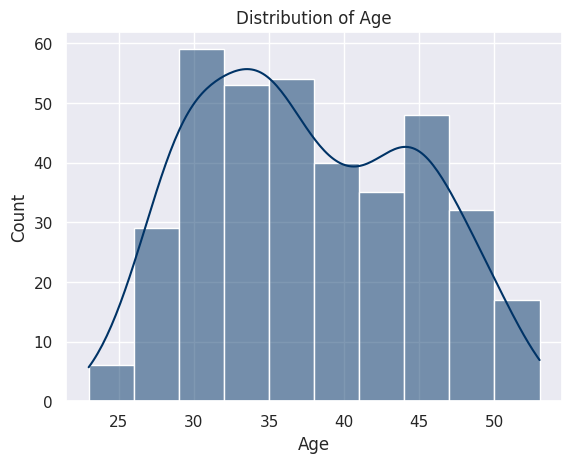

In [13]:
sns.set_theme(style="darkgrid") # used for shwoing grid(boxes)
sns.histplot(data["Age"],kde=True ,color="#003366")    # for color=""Cyan"#bins=20 ,20 bins me data milega   #kde for knowing skew is normal +ve or _ve
plt.title("Distribution of Age")
plt.show()                       # how data is distribuated from minimum value to Maximum value Plt is used for title

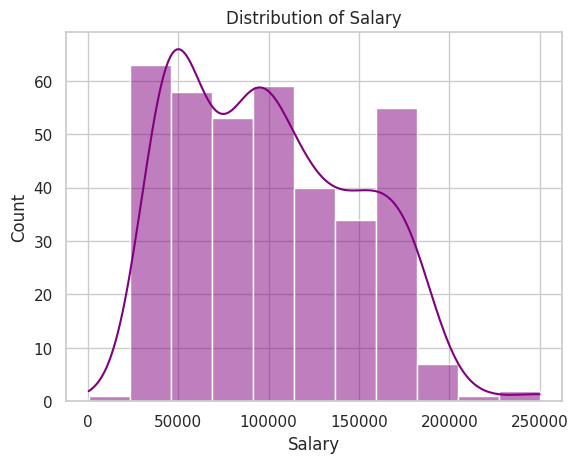

In [14]:
sns.set_theme(style="whitegrid")
sns.histplot(data["Salary"] ,kde=True ,color="Purple")
plt.title("Distribution of Salary")
plt.show()

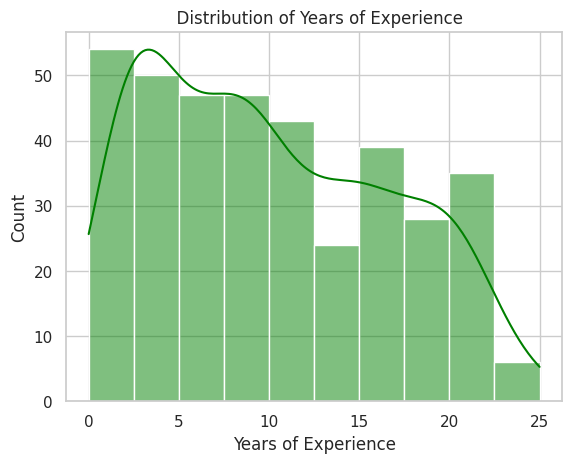

In [15]:
sns.set_theme(style="whitegrid")
sns.histplot(data["Years of Experience"],kde=True ,color="Green")
plt.title("  Distribution of Years of Experience")
plt.show()

In [16]:
data.columns # for seeing the data from the sheet directly

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

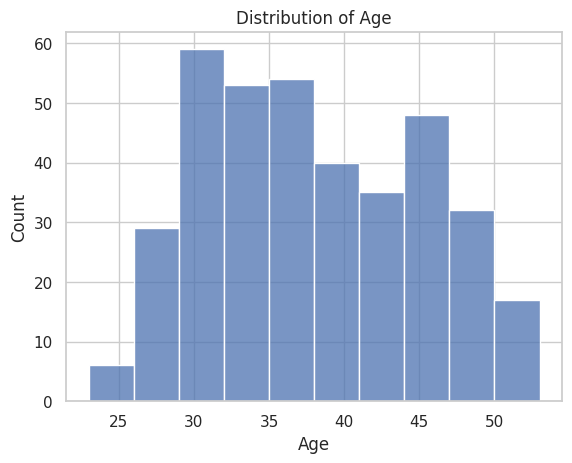

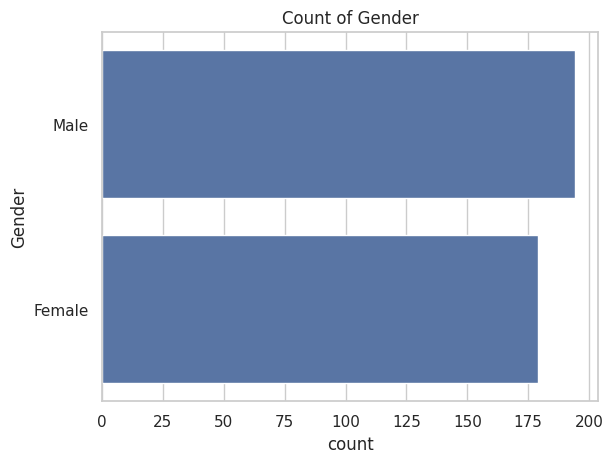

In [17]:
sns.histplot(data["Age"])
plt.title("Distribution of Age")
plt.show()


sns.countplot(data["Gender"])  #count plot for Categorical data
plt.title("Count of Gender") # histograph for numeric value
plt.show()

In [18]:
data["Gender"].value_counts() #for exact value of the male,female


,count
Gender,
Male,194
Female,179


In [19]:
data["Education Level"].value_counts()

,count
Education Level,
Bachelor's,224
Master's,98
PhD,51


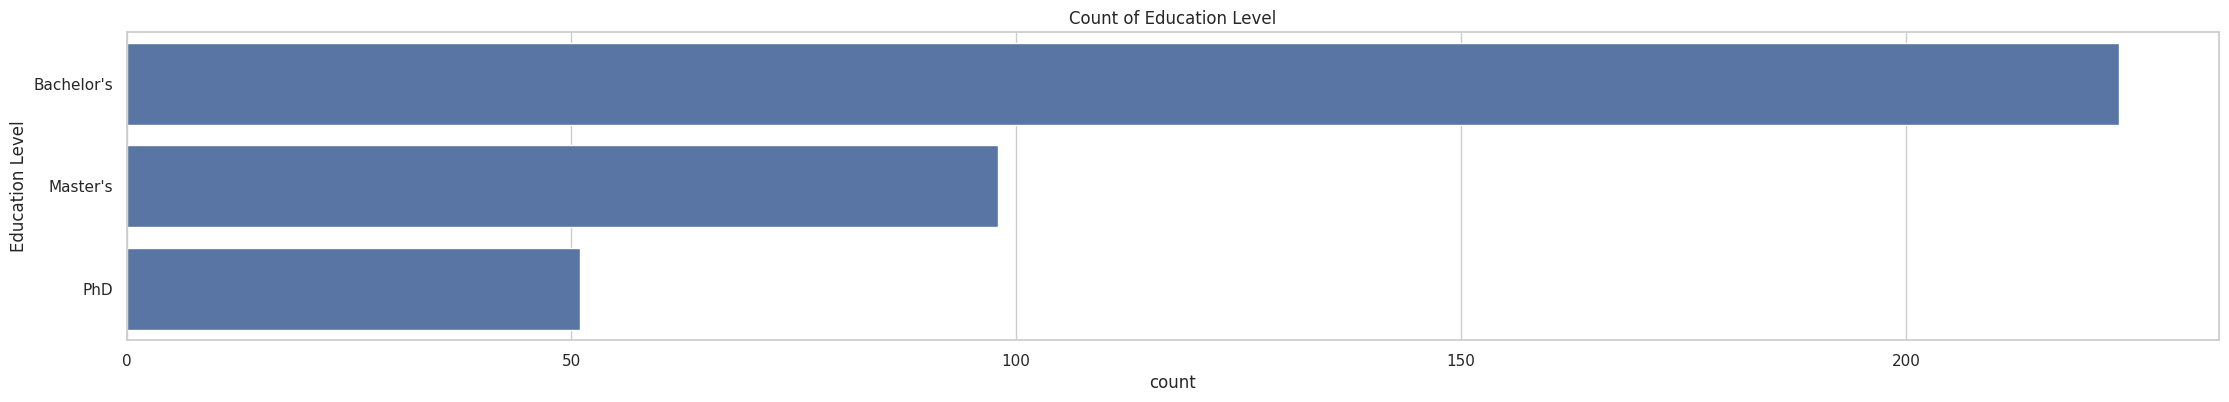

In [20]:
plt.figure(figsize=(27,4)) # for changing figure size
sns.countplot(data["Education Level"])
plt.title("Count of Education Level")
plt.show()

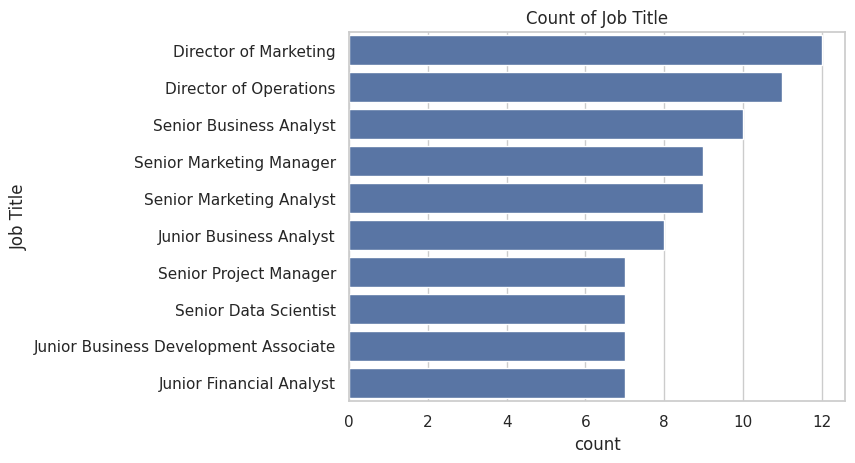

In [21]:
sns.countplot(data["Job Title"], order=data["Job Title"].value_counts().nlargest(10).index) #if value are more if would be more complex in visualization for top 5 or top 10
plt.title("Count of Job Title")
plt.show()  # top 5 or top 10

In [22]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [23]:
data.skew(numeric_only=True) # jeetna +1 rhega toh treat  sq root lena hoga krna hoga if -1  rhega toh power lena hain! if its 0  kuch ni krna h

,0
Age,0.197522
Years of Experience,0.361220
Salary,0.400578


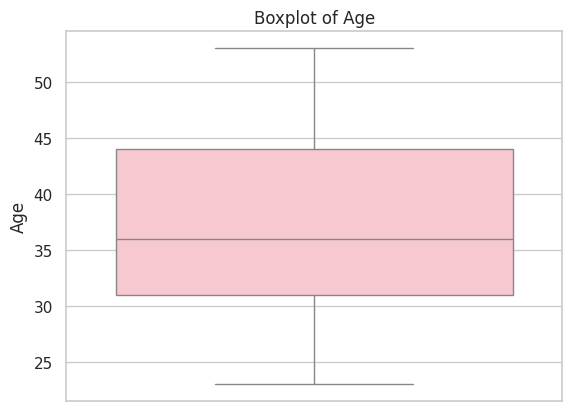

In [24]:
sns.boxplot(data["Age"],color="Pink")  #cDistrbtuion of 1st 25 21-30 ke range me then then another 25 31-36
plt.title("Boxplot of Age")
plt.show()

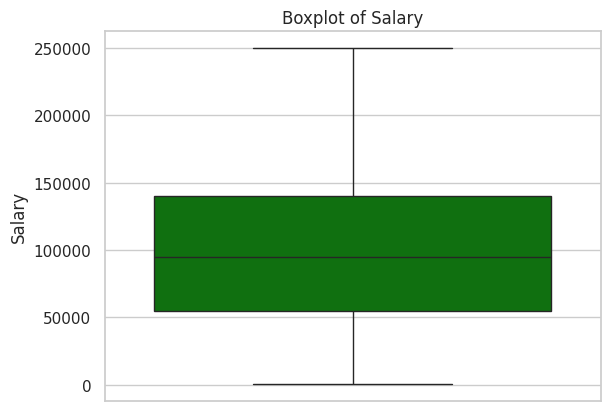

In [25]:
sns.boxplot(data["Salary"],color="Green")
plt.title("Boxplot of Salary")
plt.show()

<Axes: xlabel='Gender', ylabel='Salary'>

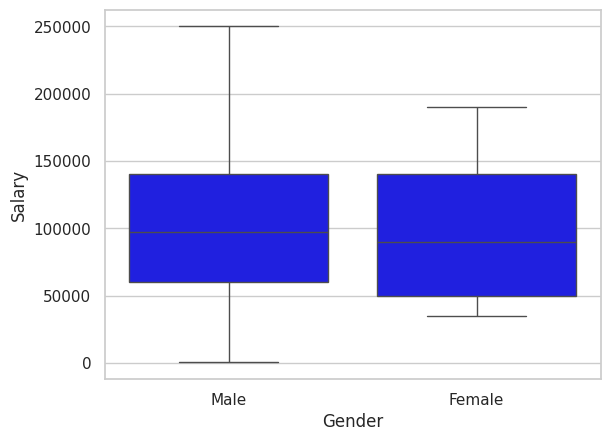

In [26]:
sns.boxplot(data=data,x="Gender",y="Salary",color="Blue")  # x axis par Gender and Y axis par salary for comparsion

<Axes: xlabel='Education Level', ylabel='Salary'>

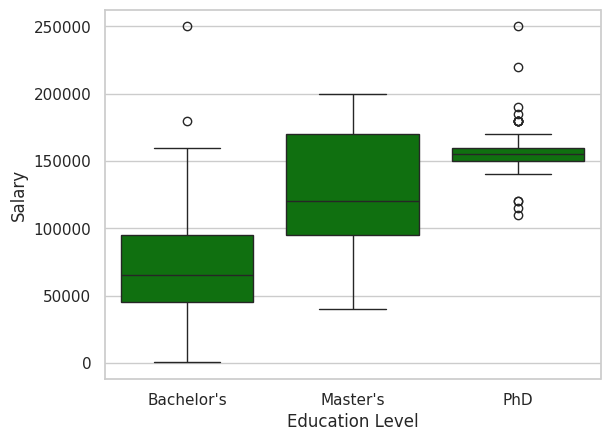

In [27]:
sns.boxplot(data=data,x="Education Level",y="Salary",color="Green")
# here circle are outliars they are out of range when then will be less it wouldnt matter we can work with it ! if its more than we will need to  handle it
# 1.opt we can round off it
# 2.opt Drop It

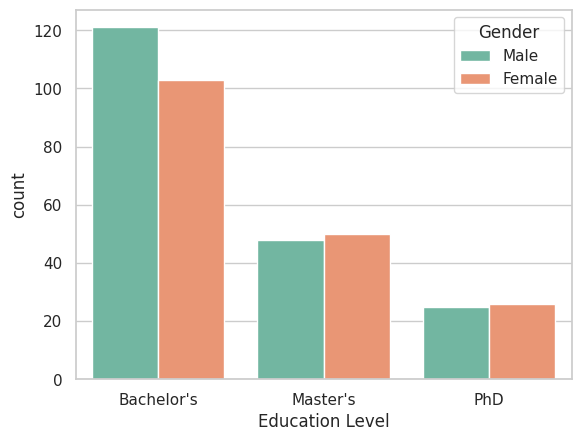

In [28]:
sns.countplot(data=data,x="Education Level",hue="Gender",palette="Set2")
plt.show()
 # hue="jisko define kia h uska utna section miltha h for eg Male and female" we need graph jisme kitne male ka bachlor ka phd hua master hua and level hua and same for female

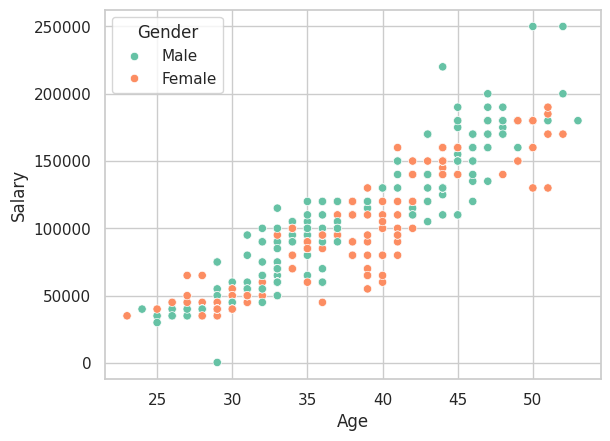

In [29]:
sns.scatterplot(data=data,x="Age",y="Salary" ,hue="Gender",palette="Set2")
plt.show()

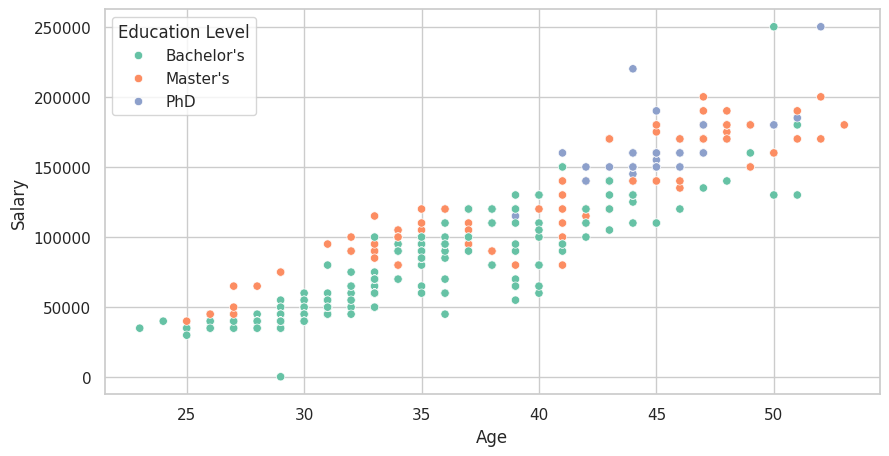

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,hue="Education Level",y="Salary" ,x="Age",palette="Set2")
plt.show()

Preprocessing of data

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # it converts to numeric data for heatmap

In [32]:
data["Gender"]=le.fit_transform(data["Gender"])

In [33]:
data.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,0,Master's,Data Analyst,3.0,65000.0
2,45.0,1,PhD,Senior Manager,15.0,150000.0


In [35]:
data["Education Level"]= le.fit_transform(data["Education Level"])
data["Job Title"]= le.fit_transform(data["Job Title"])

In [36]:
data.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [34]:
data["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    int64  
 2   Education Level      373 non-null    int64  
 3   Job Title            373 non-null    int64  
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 20.4 KB


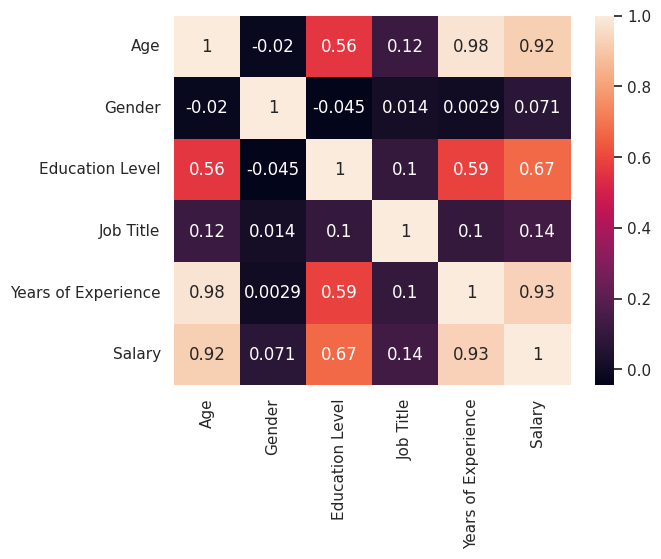

In [38]:
sns.heatmap(data.corr(),annot=True) # for showing no.s annot=True
plt.show()

In [39]:
# here in grpah independent varible is the Target value for eg salary and
# dependent variable is for exmaple age Education

In [40]:
# Scaling ( but we dont have to excute) jab numeric  value ka range bohot zyda hoga tab use karenge scaling
# jab hamara data skewed hota h ya outliars hote h toh ham robust range mean hot ah 0 (-ve to +ve) kitna b ja saktha h use krte h
# jab symmetrically data standard scaling range (0 to 1)and  mean max range -1 to 1

In [41]:
# scaling
from sklearn.preprocessing import StandardScaler
rs=StandardScaler()

In [42]:
# data["Aage"]=rs.fit_transform(data[["Aage"]])


**SPLITTING THE DATA**

In [43]:
# splitting the data
from sklearn.model_selection import train_test_split # we are importing the data for train & test

In [44]:
x=data.drop("Salary",axis=1) # spltting to target and Features variable
y=data["Salary"]

In [45]:
# splitting for train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42 ) # jab ham firse run karenge toh if we dont write random data toh alag alag data lega
# we can write anything instead of 42 its ideal 42

In [46]:
#  we are setting up model
#logistic regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

 # fitting model
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
# predicting
y_pred=lr.predict(x_test)

In [48]:
# imprting libraries for
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [49]:
# mean absoute error = avg of error ky range me model galat peform krta h
# mean sq error = sq kr deta h error ka
#r2 jeetba closer to 1 h utna aacha perform kr rha h jab 0 k aspas h toh bura perform kr rha h
# if its in -ve toh sabse bura h vo
print("MAE is",mae)
print("MSE is",mse)
print("R2 is",r2) # value mostly 90% k uppar  kahi par bhi aur ye 99% or 1% ni chaiye hame

MAE is 10928.921486231397
MSE is 249075656.42722148
R2 is 0.8961138207821864


In [50]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

y_pred_dtr=dtr.predict(x_test)

In [51]:
mae=mean_absolute_error(y_test,y_pred_dtr)
mse=mean_squared_error(y_test,y_pred_dtr)
r2=r2_score(y_test,y_pred_dtr)

In [52]:
print("MAE is",mae)
print("MSE is",mse)
print("R2 is",r2)

MAE is 10266.666666666666
MSE is 236000000.0
R2 is 0.9015675050421165


In [53]:
# Random Tree
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(x_train,y_train)

y_pred_rfr=rfr.predict(x_test)

In [54]:
mae=mean_absolute_error(y_test,y_pred_rfr)
mse=mean_squared_error(y_test,y_pred_rfr)
r2=r2_score(y_test,y_pred_rfr)

In [55]:
print("MAE is",mae)
print("MSE is",mse)
print("R2 is",r2)

MAE is 8524.791
MSE is 143564355.423075
R2 is 0.9401211962232473


In [56]:
# for XG boost
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

y_pred_gbr=gbr.predict(x_test)

In [57]:
mae=mean_absolute_error(y_test,y_pred_gbr)
mse=mean_squared_error(y_test,y_pred_gbr)
r2=r2_score(y_test,y_pred_gbr)

In [58]:
print("MAE is",mae)
print("MSE is",mse)
print("R2 is",r2)

MAE is 8981.8668384598
MSE is 176641369.57690713
R2 is 0.926325208812574


In [59]:
# konsa column hame sabse zyda useful h for building model
# for random forest since uska r ka value zyda h
importance=rfr.feature_importances_  # features ka naam h
features = x.columns # imp feautres ka count hoga

In [60]:
# Creating Data Frame
fea_imp= pd.DataFrame({"Features":features,"Importance":importance})

In [61]:
fea_imp.head()

,Features,Importance
0,Age,0.583175
1,Gender,0.003158
2,Education Level,0.026682
3,Job Title,0.115730
4,Years of Experience,0.271255


In [62]:

# value as per imprtance
fea_imp=fea_imp.sort_values(by="Importance",ascending=False)

In [63]:
fea_imp.head()

,Features,Importance
0,Age,0.583175
4,Years of Experience,0.271255
3,Job Title,0.115730
2,Education Level,0.026682
1,Gender,0.003158


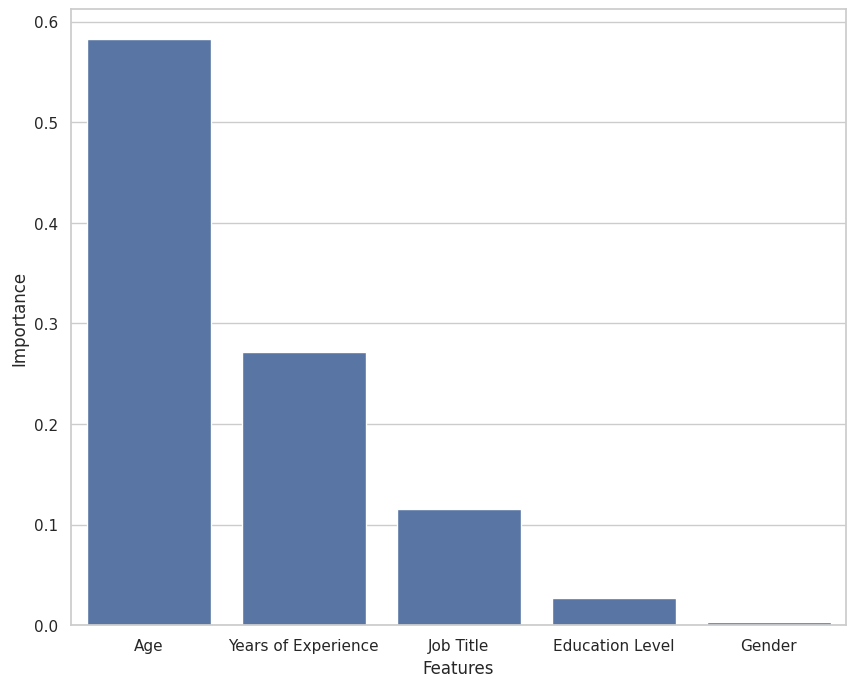

In [64]:
# we are going to visualize it by horizontal bar grph
plt.figure(figsize=(10,8))
sns.barplot(data=fea_imp,x="Features",y="Importance")
plt.show()

In [65]:
# saving the model
# so in future we can directly start from here
import joblib

In [66]:
joblib.dump(rfr, 'salary_prediction_model.joblib')

['salary_prediction_model.joblib']

In [67]:
#for Download
from google.colab import files
files.download("salary_prediction_model.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving Salary_Data_Prediction to Salary_Data_Prediction
User uploaded file "Salary_Data_Prediction" with length 331374 bytes


In [70]:
import joblib

loaded_model = joblib.load('salary_prediction_model.joblib')
print("Model loaded successfully!")

Model loaded successfully!
